In [105]:
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns

In [106]:
data = pd.read_csv("thyroid_cancer_risk_data.csv")
print(data.info())
data = data.drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Patient_ID           212691 non-null  int64  
 1   Age                  212691 non-null  int64  
 2   Gender               212691 non-null  object 
 3   Country              212691 non-null  object 
 4   Ethnicity            212691 non-null  object 
 5   Family_History       212691 non-null  object 
 6   Radiation_Exposure   212691 non-null  object 
 7   Iodine_Deficiency    212691 non-null  object 
 8   Smoking              212691 non-null  object 
 9   Obesity              212691 non-null  object 
 10  Diabetes             212691 non-null  object 
 11  TSH_Level            212691 non-null  float64
 12  T3_Level             212691 non-null  float64
 13  T4_Level             212691 non-null  float64
 14  Nodule_Size          212691 non-null  float64
 15  Thyroid_Cancer_Ri

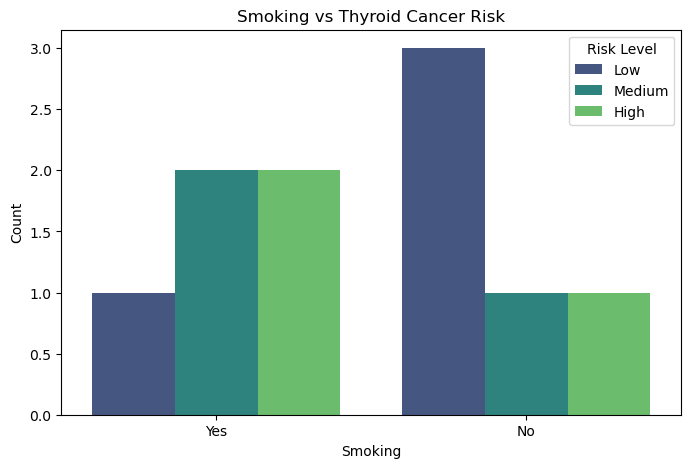

In [107]:
data = {
    "Thyroid_Cancer_Risk": ["Low", "Medium", "High", "Low", "High", "Medium", "Low", "High", "Low", "Medium"],
    "Family_History": ["Yes", "No", "Yes", "No", "Yes", "No", "Yes", "No", "Yes", "No"],
    "Radiation_Exposure": ["Yes", "No", "No", "Yes", "Yes", "No", "No", "Yes", "No", "Yes"],
    "Smoking": ["Yes", "No", "No", "No", "Yes", "Yes", "No", "Yes", "No", "Yes"]
}

df = pd.DataFrame(data)

risk_factor = "Smoking"

# Bar Chart
plt.figure(figsize=(8, 5))
sns.countplot(x=risk_factor, data=df, hue="Thyroid_Cancer_Risk", palette="viridis", order=["Yes", "No"])
plt.title(f"{risk_factor} vs Thyroid Cancer Risk")
plt.xlabel(risk_factor)
plt.ylabel("Count")
plt.legend(title="Risk Level", labels=["Low", "Medium", "High"])
plt.show()

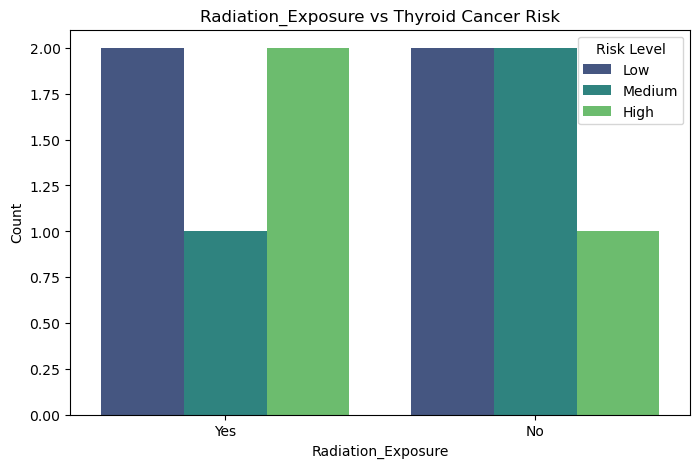

In [108]:
data = {
    "Thyroid_Cancer_Risk": ["Low", "Medium", "High", "Low", "High", "Medium", "Low", "High", "Low", "Medium"],
    "Family_History": ["Yes", "No", "Yes", "No", "Yes", "No", "Yes", "No", "Yes", "No"],
    "Radiation_Exposure": ["Yes", "No", "No", "Yes", "Yes", "No", "No", "Yes", "No", "Yes"],
    "Smoking": ["Yes", "No", "No", "No", "Yes", "Yes", "No", "Yes", "No", "Yes"]
}
df = pd.DataFrame(data)

risk_factor = "Radiation_Exposure"

# Bar Chart
plt.figure(figsize=(8, 5))
sns.countplot(x=risk_factor, data=df, hue="Thyroid_Cancer_Risk", palette="viridis", order=["Yes", "No"])
plt.title(f"{risk_factor} vs Thyroid Cancer Risk")
plt.xlabel(risk_factor)
plt.ylabel("Count")
plt.legend(title="Risk Level", labels=["Low", "Medium", "High"])
plt.show()

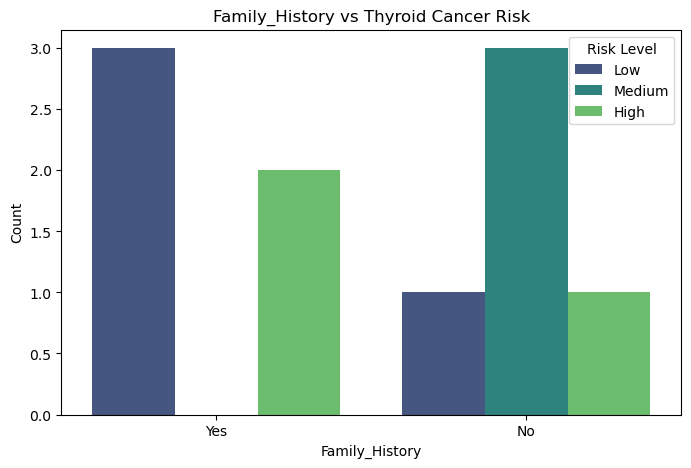

In [109]:
data = {
    "Thyroid_Cancer_Risk": ["Low", "Medium", "High", "Low", "High", "Medium", "Low", "High", "Low", "Medium"],
    "Family_History": ["Yes", "No", "Yes", "No", "Yes", "No", "Yes", "No", "Yes", "No"],
    "Radiation_Exposure": ["Yes", "No", "No", "Yes", "Yes", "No", "No", "Yes", "No", "Yes"],
    "Smoking": ["Yes", "No", "No", "No", "Yes", "Yes", "No", "Yes", "No", "Yes"]
}
df = pd.DataFrame(data)

risk_factor = "Family_History"

# Bar Chart
plt.figure(figsize=(8, 5))
sns.countplot(x=risk_factor, data=df, hue="Thyroid_Cancer_Risk", palette="viridis", order=["Yes", "No"])
plt.title(f"{risk_factor} vs Thyroid Cancer Risk")
plt.xlabel(risk_factor)
plt.ylabel("Count")
plt.legend(title="Risk Level", labels=["Low", "Medium", "High"])
plt.show()


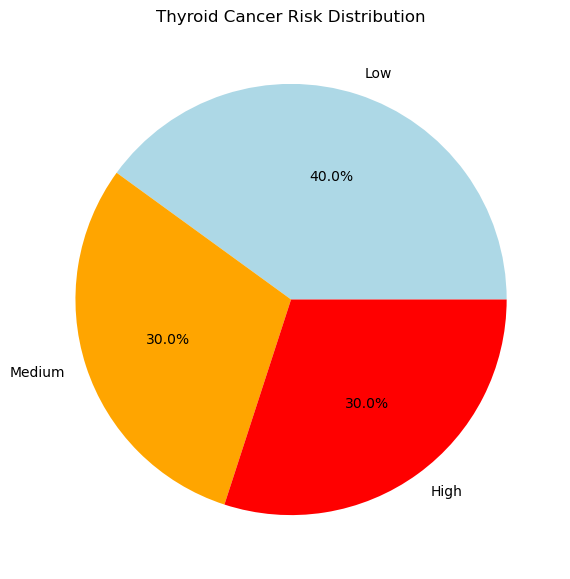

In [110]:
# Pie chart
data = pd.DataFrame({
    "Thyroid_Cancer_Risk": ["Low", "Medium", "High", "Low", "High", "Medium", "Low", "High", "Low", "Medium"]
})

# Compute Counts
risk_counts = data['Thyroid_Cancer_Risk'].value_counts()

# Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(risk_counts, labels=risk_counts.index, autopct='%1.1f%%', colors=['lightblue', 'orange', 'red'])
plt.title('Thyroid Cancer Risk Distribution')
plt.show()

In [111]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Load dataset
data = pd.read_csv("thyroid_cancer_risk_data.csv")

# Identify categorical columns  
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical columns detected:", categorical_columns)

# Apply Label Encoding to categorical variables
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])  # Convert categories to numbers

# Define features (X) and target variable (y)
X = data.drop(columns=['Thyroid_Cancer_Risk'])  # Features
y = data['Thyroid_Cancer_Risk']  # Target

# Confirm y is numeric
y = y.astype(int)

# Split into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# Logistic Regression model
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

# Evaluate model
print("\nLogistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

# Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

# Evaluate model
print("\nDecision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# Evaluate model
print("\nRandom Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Categorical columns detected: ['Gender', 'Country', 'Ethnicity', 'Family_History', 'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 'Obesity', 'Diabetes', 'Thyroid_Cancer_Risk', 'Diagnosis']

Training set size: (170152, 16)
Testing set size: (42539, 16)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Performance:
Accuracy: 0.5337925198053551
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.48      0.48      6398
           1       0.55      0.90      0.68     21693
           2       0.24      0.01      0.02     14448

    accuracy                           0.53     42539
   macro avg       0.43      0.46      0.39     42539
weighted avg       0.44      0.53      0.43     42539


Decision Tree Performance:
Accuracy: 0.6484637626648487
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      6398
           1       0.59      0.99      0.74     21693
           2       0.00      0.00      0.00     14448

    accuracy                           0.65     42539
   macro avg       0.52      0.65      0.56     42539
weighted avg       0.45      0.65      0.52     42539



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Random Forest Performance:
Accuracy: 0.6595124474012083
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      6398
           1       0.60      1.00      0.75     21693
           2       0.00      0.00      0.00     14448

    accuracy                           0.66     42539
   macro avg       0.53      0.67      0.58     42539
weighted avg       0.46      0.66      0.53     42539




Model Accuracy Comparison:
                 Model  Accuracy
0  Logistic Regression  0.533793
1        Decision Tree  0.648464
2        Random Forest  0.659512


/var/folders/hr/0mx1xlm948b2mhg_w5hrwdgm0000gn/T/ipykernel_56198/2405592381.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=model_scores_df, palette="viridis")


Text(0.5, 1.0, 'Model Performance Comparison')

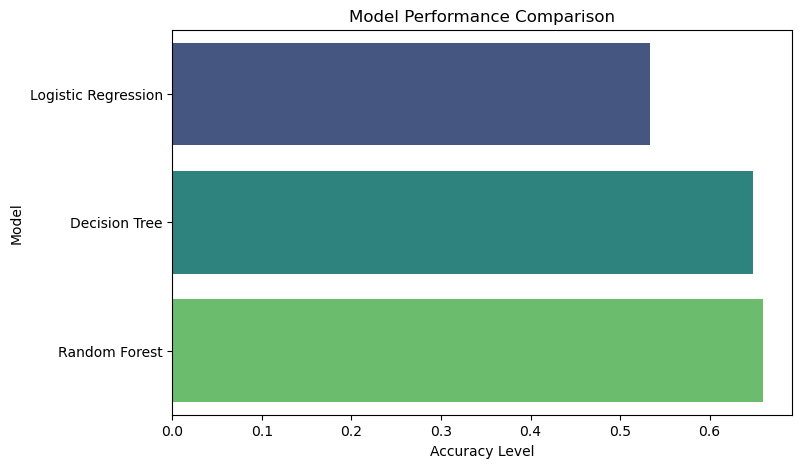

In [112]:
# Storing accuracy scores
model_scores = {
    "Logistic Regression": accuracy_score(y_test, y_pred_log),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
}
model_scores_df = pd.DataFrame(list(model_scores.items()), columns=["Model", "Accuracy"])

# Display accuracy scores
print("\nModel Accuracy Comparison:")
print(model_scores_df)

# Model comparison
plt.figure(figsize=(8, 5))
sns.barplot(x="Accuracy", y="Model", data=model_scores_df, palette="viridis")
plt.xlabel("Accuracy Level")
plt.ylabel("Model")
plt.title("Model Performance Comparison")